https://www.kaggle.com/competitions/home-data-for-ml-course/code

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression


In [42]:
# 1. Veri Seti: California Housing Dataset
data1 = fetch_california_housing()
df1 = pd.DataFrame(data1.data, columns=data1.feature_names)
df1['Target'] = data1.target


In [43]:
# Eksik değer kontrolü
df1.dropna(inplace=True)

In [44]:
# Veri keşfi
print(df1.describe())
print(df1.info())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

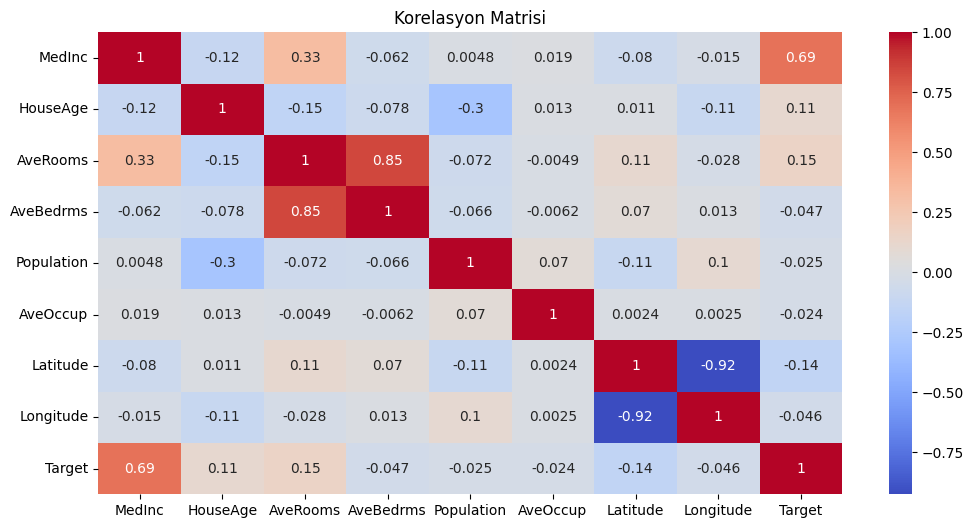

In [45]:
# Veri görselleştirme
plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

In [46]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = df1.drop(columns=['Target'])
y = df1['Target']

In [47]:
# En iyi özellikleri seçme
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Seçilen Öznitelikler:", selected_features)

Seçilen Öznitelikler: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


In [48]:
# Eğitim ve test verisi ayırma
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [49]:
# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Polinom regresyon için dönüşüm
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [51]:
# Modellerin tanımlanması ve eğitilmesi
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Polynomial Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

Linear Regression - MSE: 0.6383, R2 Score: 0.5129
Ridge Regression - MSE: 0.6382, R2 Score: 0.5130
Lasso Regression - MSE: 0.6796, R2 Score: 0.4814
Polynomial Regression - MSE: 0.8826, R2 Score: 0.3264
Decision Tree Regressor - MSE: 0.8546, R2 Score: 0.3479
KNN Regressor - MSE: 0.5391, R2 Score: 0.5886


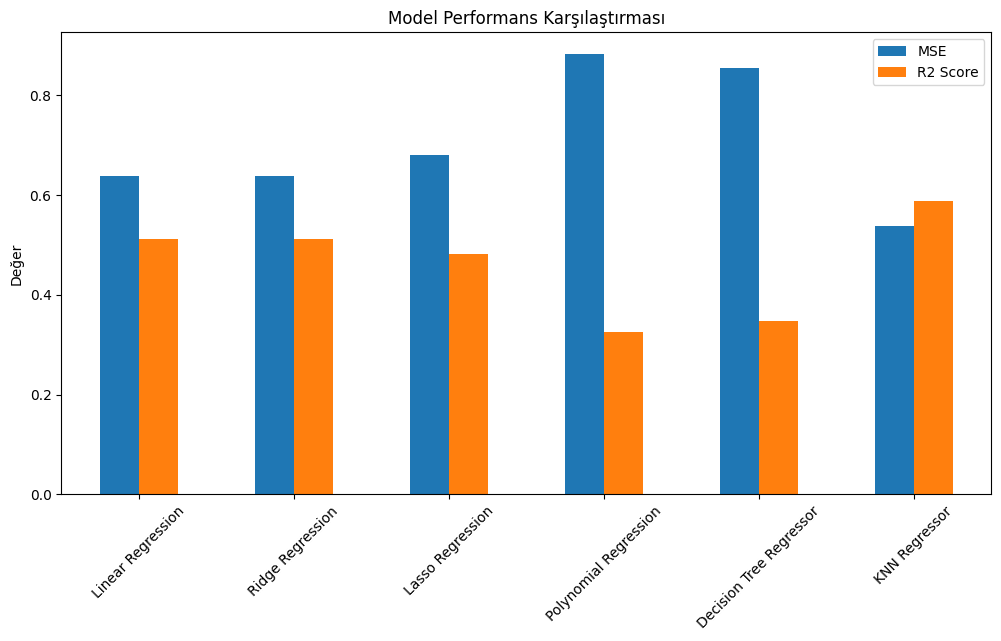

In [52]:
results = {}

for name, model in models.items():
    if name == "Polynomial Regression":
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

# Sonuçların görselleştirilmesi
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Değer")
plt.xticks(rotation=45)
plt.show()